In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
pd.options.mode.chained_assignment = None  # default='warn'

METADATA = {'Contributor': 'T. Dunn'}
FSIZE = [5,4]
FDPI = 100
SAVEFIGS = False

df0 = pd.read_csv('monster-saves.csv')
df0 = df0.astype({'Book': 'category', 'Category': 'category', 'Legendary': 'category', 'Type': 'category', 'Size': 'category'})
print('Includes {} monsters in database'.format(len(df0.index.to_list())))

Includes 1473 monsters in database


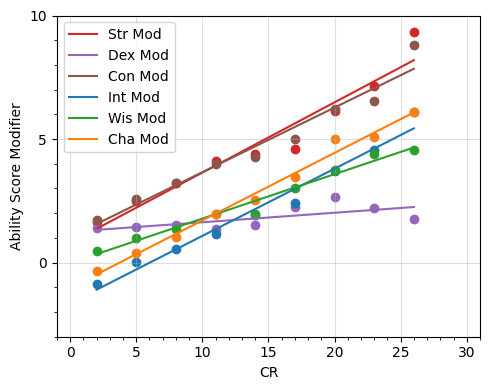

In [2]:
# Ability score modifier
columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1.loc[:,'CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=100, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,10], xlabel='CR', ylabel='Ability Score Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

if SAVEFIGS: plt.savefig('./monster-ability-score-modifier-trends.svg', metadata=METADATA)

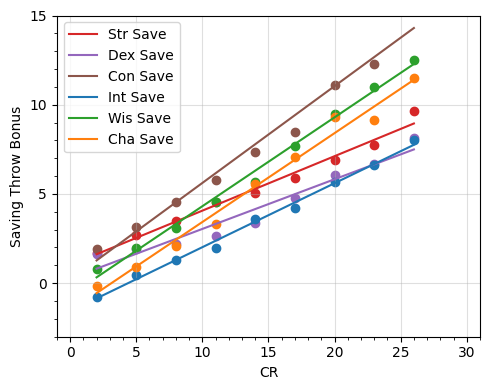

In [3]:
# Saving throw modifier
columns = ['Str Save','Dex Save','Con Save','Int Save','Wis Save','Cha Save']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=100, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,15], xlabel='CR', ylabel='Saving Throw Bonus')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

if SAVEFIGS: plt.savefig('./monster-saving-throw-modifier-trends.svg', metadata=METADATA)

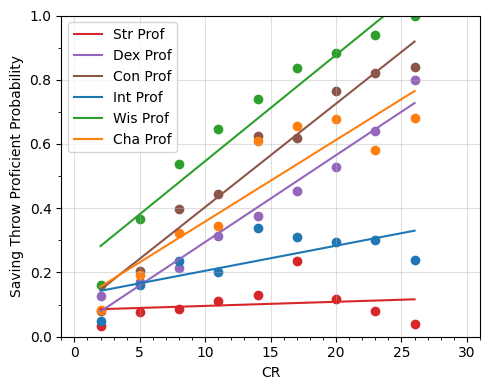

In [4]:
# Saving throw proficiency
columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=100, tight_layout=True)
ax = plt.axes()


x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[0,1], xlabel='CR', ylabel='Saving Throw Proficient Probability')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

if SAVEFIGS: plt.savefig('./monster-saving-throw-proficiency-trends.svg', metadata=METADATA)

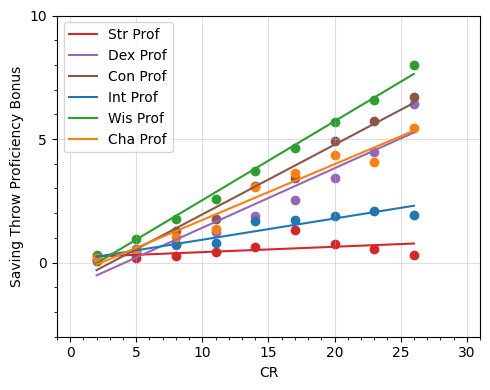

In [5]:
# Saving throw proficiency bonus
columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=100, tight_layout=True)
ax = plt.axes()


x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column]*dfG['PB'], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column]*dfG['PB'], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,10], xlabel='CR', ylabel='Saving Throw Proficiency Bonus')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

if SAVEFIGS: plt.savefig('./monster-saving-throw-proficiency-bonus-trends.svg', metadata=METADATA)

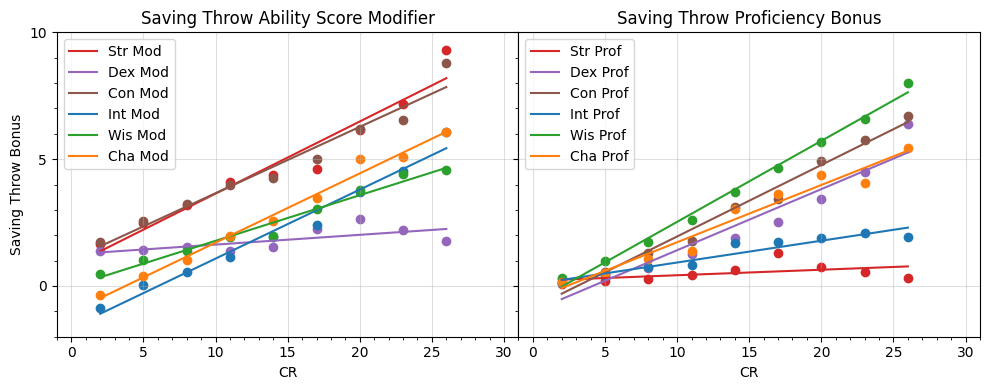

In [6]:
# Saving throw bonuses breakdown - horizontal
df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

rSub = 1; cSub = 2
fig = plt.figure(figsize=[FSIZE[0]*cSub,FSIZE[1]*rSub], dpi=100, tight_layout=True)
gs = fig.add_gridspec(rSub, cSub, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
# trends
ax = axs[0]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(ylabel='Saving Throw Bonus', title='Saving Throw Ability Score Modifier')

columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
# trends
ax = axs[1]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column]*dfG['PB'], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column]*dfG['PB'], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(ylabel='Saving Throw Bonus', title='Saving Throw Proficiency Bonus')

for ax in axs:
    ax.set(xlim=[-1,31], ylim=[-2,10], xlabel='CR')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', axis='both', alpha=0.4)
    ax.label_outer()
    ax.legend()

if SAVEFIGS: plt.savefig('./monster-saving-throw-bonuses-trends-horizontal.svg', metadata=METADATA)

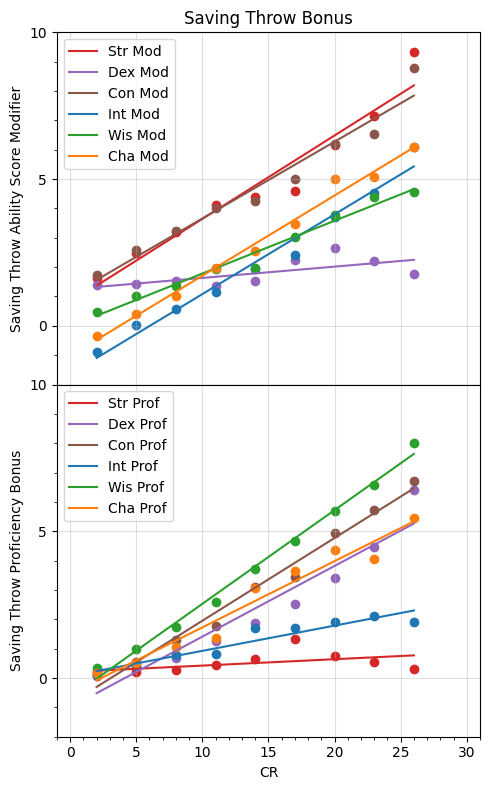

In [7]:
# Saving throw bonuses breakdown - vertical
df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

rSub = 2; cSub = 1
fig = plt.figure(figsize=[FSIZE[0]*cSub,FSIZE[1]*rSub], dpi=100, tight_layout=True)
gs = fig.add_gridspec(rSub, cSub, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
# trends
ax = axs[0]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(title='Saving Throw Bonus', ylabel='Saving Throw Ability Score Modifier')

columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
# trends
ax = axs[1]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column]*dfG['PB'], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column]*dfG['PB'], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(ylabel='Saving Throw Proficiency Bonus')

for ax in axs:
    ax.set(xlim=[-1,31], ylim=[-2,10], xlabel='CR')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', axis='both', alpha=0.4)
    ax.label_outer()
    ax.legend()

if SAVEFIGS: plt.savefig('./monster-saving-throw-bonuses-trends-vertical.svg', metadata=METADATA)